In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

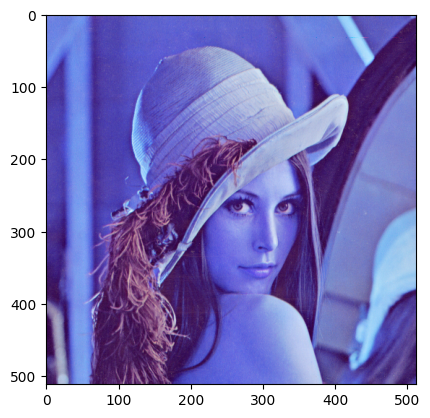

In [ ]:
path = "/content/drive/MyDrive/Lenna_(test_image).png"
img_BGR = cv.imread(path)
plt.imshow(img_BGR)

In [ ]:
type(img_BGR)

numpy.ndarray

In [ ]:
img_BGR[:2,:2]

array([[[125, 137, 226],
        [125, 137, 226]],

       [[125, 137, 226],
        [125, 137, 226]]], dtype=uint8)

In [ ]:
img_BGR

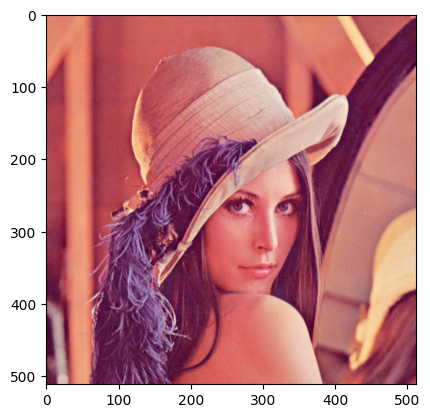

In [ ]:
img_RGB = cv.cvtColor(img_BGR, cv.COLOR_BGR2RGB)
plt.imshow(img_RGB)

In [ ]:
img_RGB[:2,:2]

array([[[226, 137, 125],
        [226, 137, 125]],

       [[226, 137, 125],
        [226, 137, 125]]], dtype=uint8)

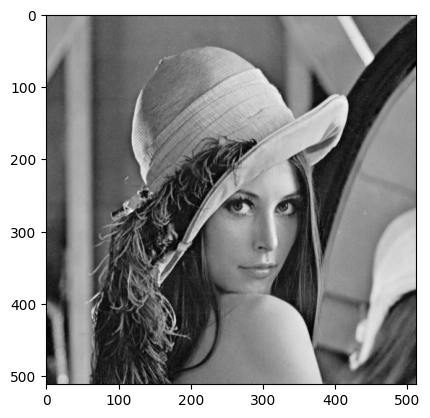

In [ ]:
img_gray = cv.cvtColor(img_RGB, cv.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray")# cmap="gray"

In [ ]:
img_gray[:2,:2]

array([[162, 162],
       [162, 162]], dtype=uint8)

In [ ]:
img = img_RGB

In [ ]:
img.shape

(512, 512, 3)

### Görüntü kırpma

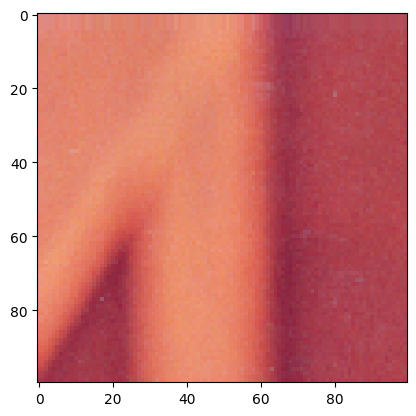

In [ ]:
plt.imshow(img[0:100,0:100]) # ilk params height, ikinci kısım width

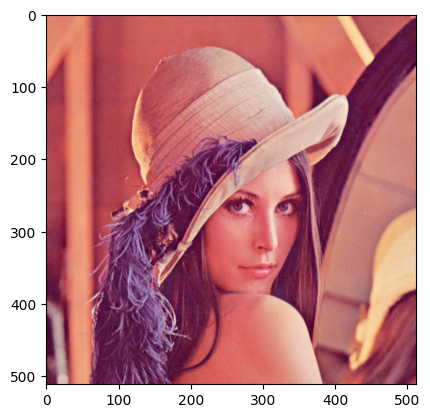

In [ ]:
plt.imshow(img)

# Görüntü Boyutlandırma

Resized Img Shape:  (100, 100, 3)


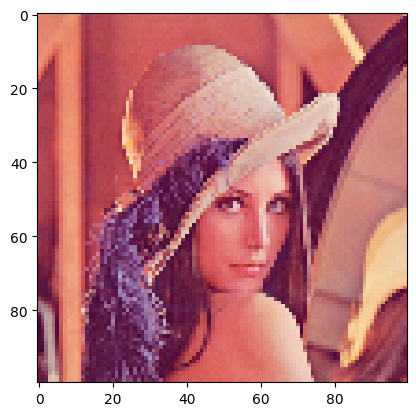

In [ ]:
imgResized = cv.resize(img, (100,100))
print("Resized Img Shape: ", imgResized.shape)
plt.imshow(imgResized)

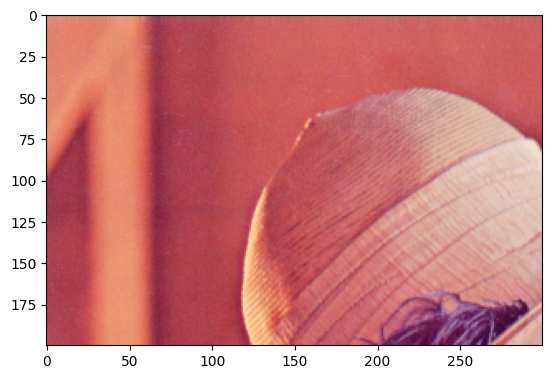

In [ ]:
imgCropped = img[:200,:300]
plt.imshow(imgCropped)

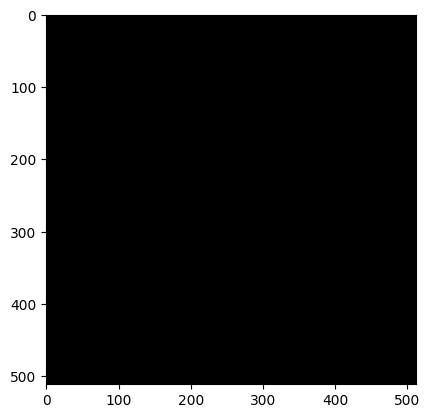

In [ ]:
img = np.zeros((512,512,3), np.uint8) # siyah bir resim
plt.imshow(img)

#### OpenCV kullanmadan yeşil renkli bir şerit nasıl çekilir?

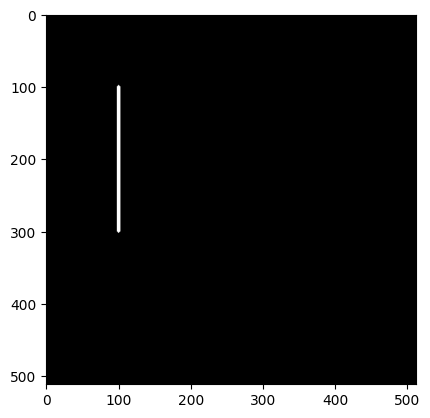

In [ ]:
# çizgi
# (resim, başlangıç noktası, bitiş noktası, renk, kalınlık)
cv.line(img, (100,100), (100,300), (255,255,255), 3) # BGR = (0,255,0)
plt.imshow(img)

#### Çözüm

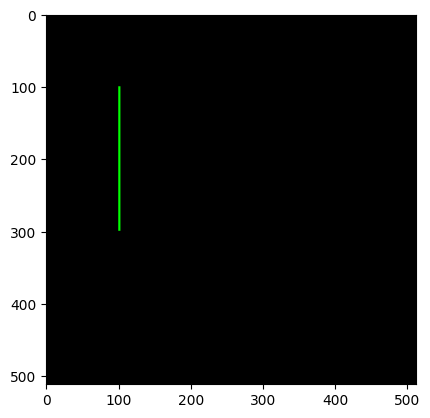

In [ ]:
img[100:300,100:103] = (0,255,0)
plt.imshow(img)

#### OpenCV kullanmadan kırmızı renkli kare nasıl oluşturulur?

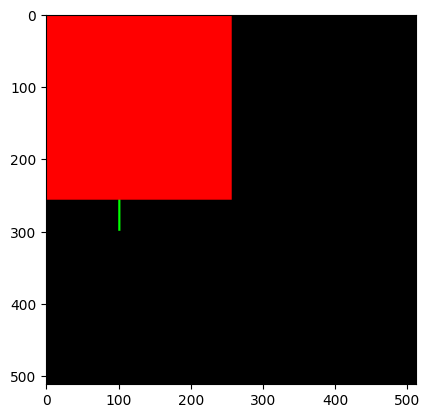

In [ ]:
# dörtgen
# (resim, başlangıç, bitiş, renk )
cv.rectangle(img, (0,0), (256,256), (255,0,0), cv.FILLED)# cv.FILLED
plt.imshow(img)

#### Çözüm

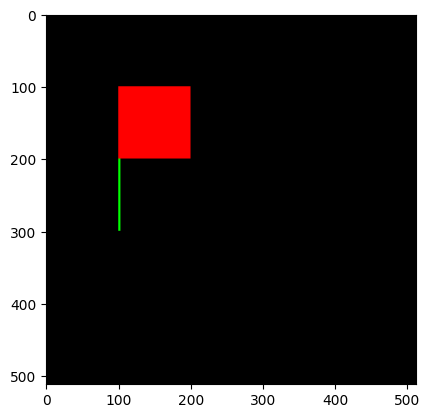

In [ ]:
img[100:200,100:200] = (255,0,0)
plt.imshow(img)

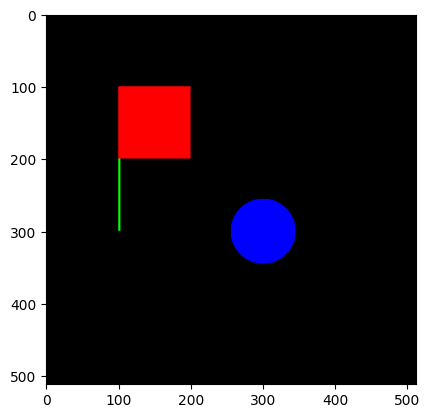

In [ ]:
# çember
# (resim, merkez, yarı çap, renk)
cv.circle(img, (300,300), 45, (0,0,255), cv.FILLED)
plt.imshow(img)

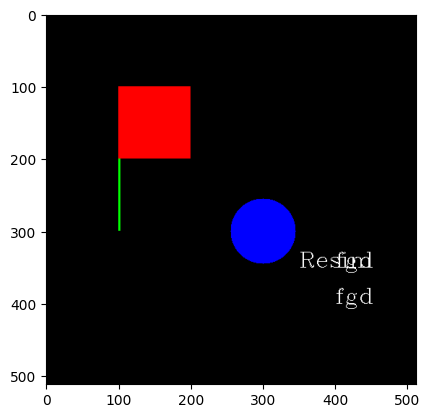

In [ ]:
# metin
# (resim, başlangıç noktası, font, kalınlığı, renk)
cv.putText(img, "fgd", (400,400), cv.FONT_HERSHEY_COMPLEX, 1, (255,255,255))
plt.imshow(img)

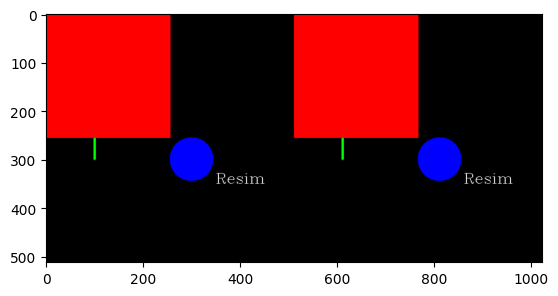

In [ ]:
# yatay
hor = np.hstack((img,img))
plt.imshow(hor)

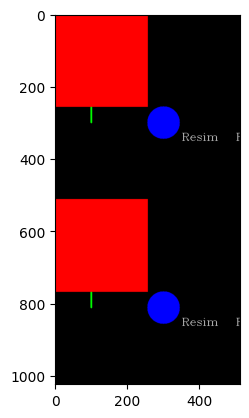

In [ ]:
# dikey
ver = np.vstack((img,img))
plt.imshow(ver)

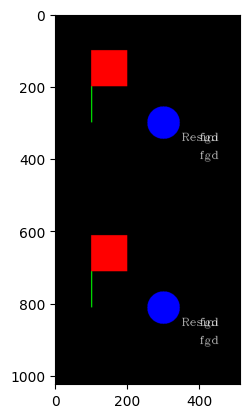

In [ ]:
plt.imshow(np.concatenate([img,img], axis=0))

In [ ]:
ver.shape

(1024, 512, 3)

#### Görüntüyü döndürmek

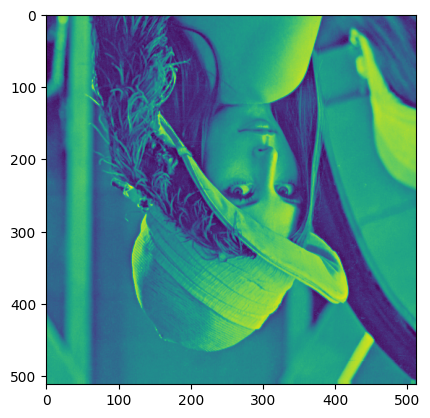

In [ ]:
plt.imshow(cv.flip(img_gray, 0))

In [ ]:
img_gray.shape[1]

512

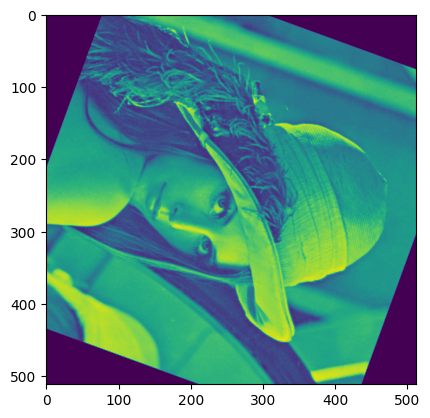

In [ ]:
M = cv.getRotationMatrix2D((img_gray.shape[1] / 2, img.shape[0] / 2), 250, 1)# Merkezi  koordinat, derece

# Görüntüyü döndür
rotated_img = cv.warpAffine(img_gray, M, (img_gray.shape[1], img_gray.shape[0]))
plt.imshow(rotated_img)

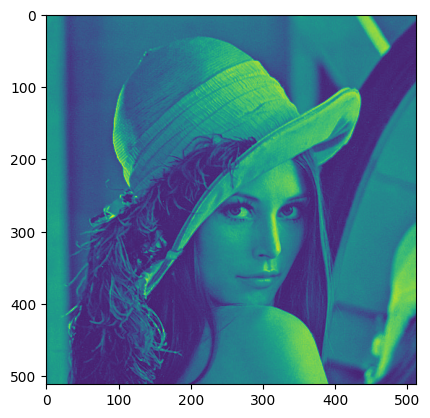

In [ ]:
plt.imshow(img_gray)

#### Çözüm

In [ ]:
img_gray[::,::-1]

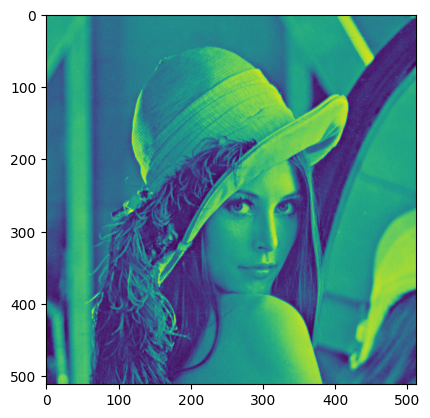

In [ ]:
plt.imshow(img_gray)

In [ ]:
img_gray[::-1,::]

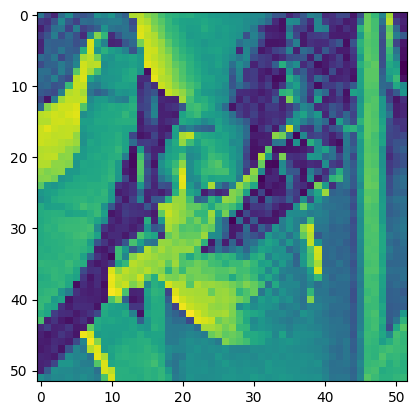

In [ ]:
plt.imshow(img_gray[::-10,::-10])

#### Bu işlemi opencv okullanmadan nasıl yaparız ?

(600, 600)
(600, 600)


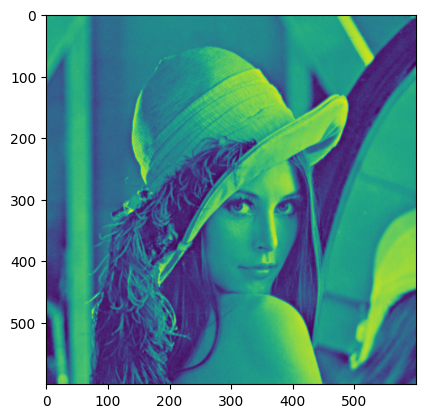

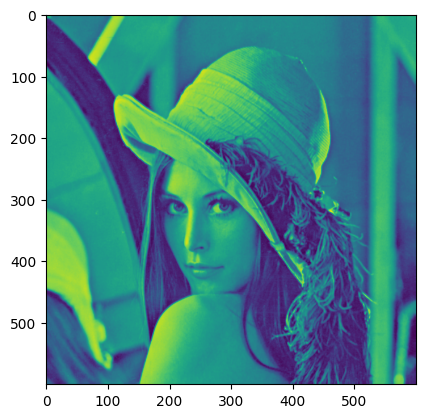

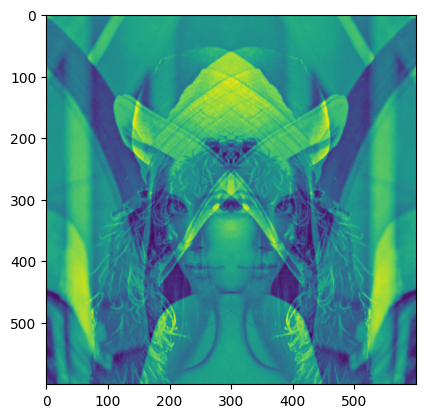

In [ ]:
img1 = cv.resize(img_gray, (600,600))
print(img1.shape)

img2 = cv.resize(img_gray[::,::-1], (600,600))
print(img2.shape)

plt.figure()
plt.imshow(img1)

plt.figure()
plt.imshow(img2)

# karıştırılmış resim = alpha*img1 + beta*img2
blended = cv.addWeighted(src1 = img1, alpha =0.5, src2= img2, beta = 0.5, gamma = 0)
plt.figure()
plt.imshow(blended)

#### Çözüm

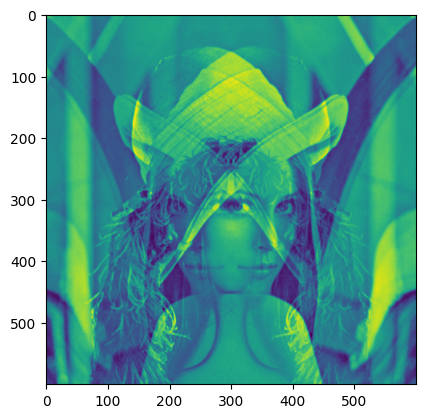

In [ ]:
alpha, beta = 0.9,0.5
im = img1*alpha + img2*beta
plt.imshow(im)

In [ ]:
img1.shape

(600, 600)

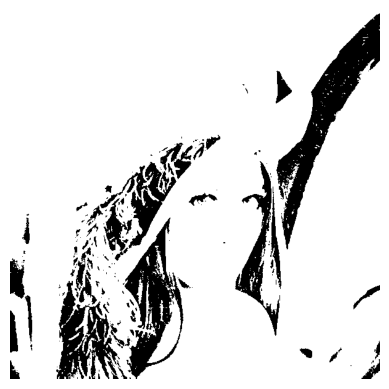

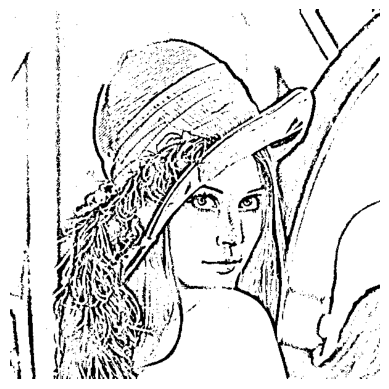

In [ ]:
_, thresh_img = cv.threshold(img1, thresh = 60, maxval = 255, type = cv.THRESH_BINARY)

plt.figure()
plt.imshow(thresh_img, cmap = "gray")
plt.axis("off")
plt.show()
thresh_img2 = cv.adaptiveThreshold(img1, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11,8)
plt.figure()
plt.imshow(thresh_img2, cmap = "gray")
plt.axis("off")
plt.show()


In [ ]:
thresh_img/255

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [ ]:
thresh = 60

# Değerlendirme matrisini oluşturun
mask = img1 > thresh
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

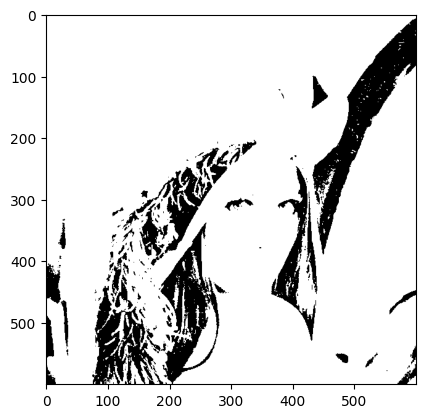

In [ ]:
thresh = 60

# Değerlendirme matrisini oluşturun
mask = img1 > thresh

# Threshold değerini uygulayın
img1[mask] = 255
img1[~mask] = 0
plt.imshow(img1, cmap="gray")

#### Histogram

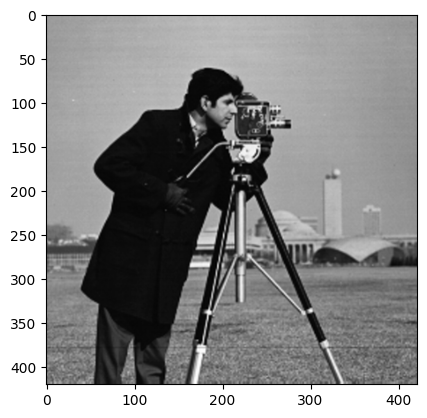

In [ ]:
path = "/content/drive/MyDrive/Resim1.png"
img = cv.imread(path)
plt.imshow(img)

In [ ]:
img.shape

(420, 422, 3)

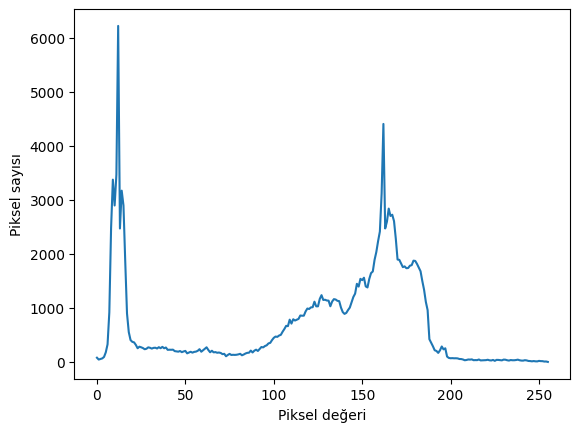

In [ ]:
import cv2
import matplotlib.pyplot as plt

hist = cv2.calcHist([img], [0], None, [256], [0, 255])

plt.plot(hist)
plt.xlabel("Piksel değeri")
plt.ylabel("Piksel sayısı")
plt.show()


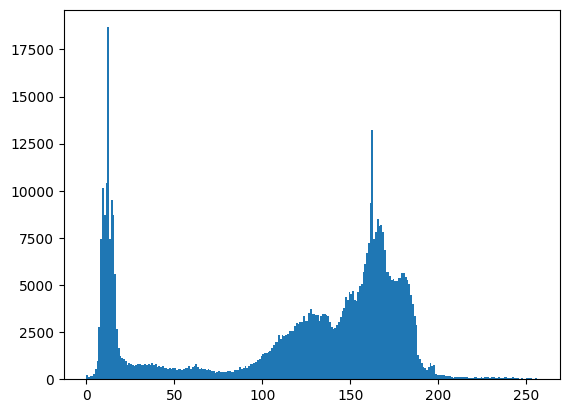

In [ ]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

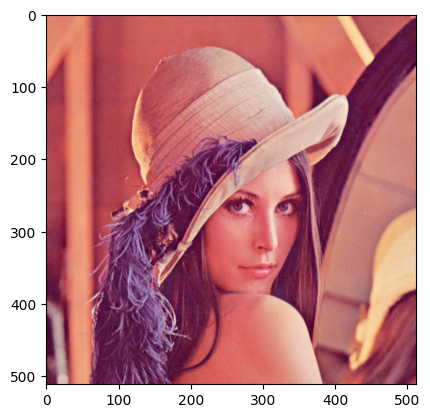

In [ ]:
plt.imshow(img_RGB)

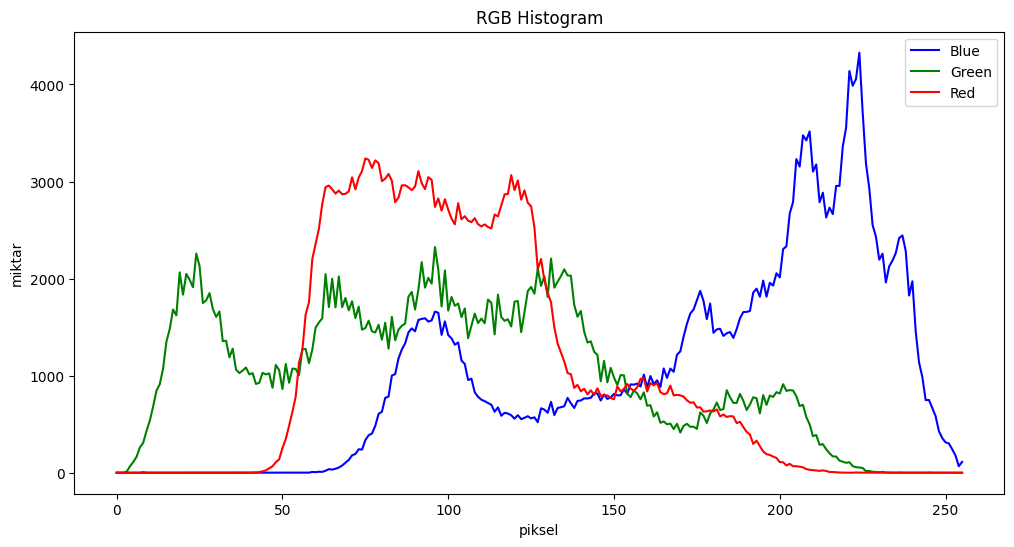

In [ ]:
hist_b = cv2.calcHist([img_RGB], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([img_RGB], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([img_RGB], [2], None, [256], [0, 256])

plt.figure(figsize=(12, 6))

plt.title('RGB Histogram')
plt.xlabel('piksel')
plt.ylabel('miktar')
plt.plot(hist_b, color='blue', label='Blue')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_r, color='red', label='Red')
plt.legend()

plt.show()

#### R

In [ ]:
img_RGB[:,:,2]

array([[125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       [125, 125, 133, ..., 122, 110,  90],
       ...,
       [ 60,  60,  58, ...,  84,  76,  79],
       [ 57,  57,  62, ...,  79,  81,  81],
       [ 57,  57,  62, ...,  79,  81,  81]], dtype=uint8)